In [1]:
# Data: https://www.kaggle.com/datasets/ninzaami/loan-predication

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv("loan_approval_data.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df1.shape

(614, 13)

In [5]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df1.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df2 = df1.dropna() 
df2.isnull().sum().sort_values(ascending = False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df2.shape

(480, 13)

In [9]:
df3 = df2.replace({"Loan_Status":{'N':0, 'Y':1}})
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [10]:
df3.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [11]:
df3.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
df3.Dependents = df3.Dependents.replace(to_replace = '3+', value =3)
df3.Dependents.value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [13]:
df3.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df3.Married.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df3.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
df3.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df3.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3.shape, df3.shape[0]

((480, 13), 480)

In [20]:
df3.shape[0] - df3['ApplicantIncome'].apply(is_float).count()

0

In [21]:
df3.shape[0] - df3['CoapplicantIncome'].apply(is_float).count()

0

In [22]:
df3.shape[0] - df3['LoanAmount'].apply(is_float).count()

0

In [23]:
df3.shape[0] - df3['Loan_Amount_Term'].apply(is_float).count()

0

In [24]:
df3.shape[0] - df3['Credit_History'].apply(is_float).count()

0

In [25]:
df4 = df3.replace({"Gender":{'Female':0, 'Male':1}})
df4.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [26]:
df4.replace({"Married":{'Yes':1,'No':0}, "Education":{'Graduate':1,'Not Graduate':0}, "Self_Employed":{'Yes':1,'No':0}, "Property_Area":{'Rural':0,'Semiurban':1, 'Urban':2}}, inplace = True)
df4.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [27]:
df4.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [28]:
df4['Dependents'] = df4['Dependents'].astype(int)

In [29]:
df4.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Dependents'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Self_Employed'),
  Text(5, 0, 'ApplicantIncome'),
  Text(6, 0, 'CoapplicantIncome'),
  Text(7, 0, 'LoanAmount'),
  Text(8, 0, 'Loan_Amount_Term'),
  Text(9, 0, 'Credit_History'),
  Text(10, 0, 'Property_Area'),
  Text(11, 0, 'Loan_Status')])

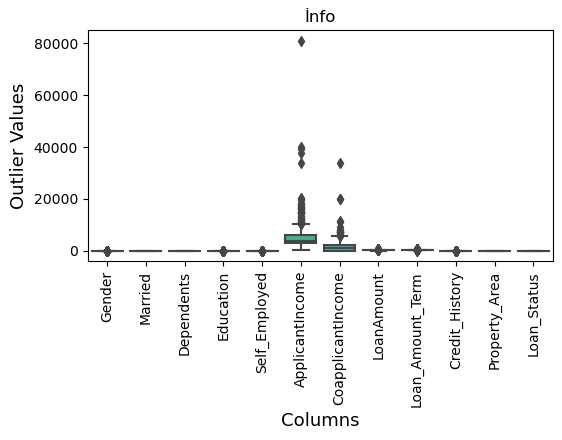

In [30]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df4);
plt.title("İnfo")
plt.ylabel("Outlier Values",size=13)
plt.xlabel("Columns",size=13)
plt.xticks(rotation=90, size=10)

In [31]:
Q1, Q3 = df4.ApplicantIncome.quantile([0.25, 0.75])
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Q1=", Q1,"Q3=", Q3,"IQR=", IQR,"lower_limit=",lower_limit,"upper_limit=",upper_limit )

Q1= 2898.75 Q3= 5852.5 IQR= 2953.75 lower_limit= -1531.875 upper_limit= 10283.125


In [32]:
df5 = df4[(df4.ApplicantIncome>lower_limit) & (df4.ApplicantIncome<upper_limit)]
df5.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,440.0000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.8250,0.645455,0.765909,0.784091,0.118182,4178.381818,1646.820273,134.072727,342.054545,0.856818,1.009091,0.697727
std,0.3804,0.478920,1.022401,0.411920,0.323191,1958.628906,2649.932443,60.384789,66.139610,0.350657,0.775425,0.459766
min,0.0000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.0000,0.000000,0.000000,1.000000,0.000000,2753.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.0000,1.000000,0.000000,1.000000,0.000000,3683.500000,1301.000000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.0000,1.000000,2.000000,1.000000,0.000000,5166.250000,2312.750000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.0000,1.000000,3.000000,1.000000,1.000000,10139.000000,33837.000000,495.000000,480.000000,1.000000,2.000000,1.000000


In [33]:
q1, q3 = df4.ApplicantIncome.quantile([0.25, 0.75])
IqR = q3-q1
q_lower_limit = q1 - 1.5*IqR
q_upper_limit = q3 + 1.5*IqR
print("q1=", q1,"q3=", q3,"IqR=", IqR,"q_lower_limit=",q_lower_limit,"q_upper_limit=",q_upper_limit )

q1= 2898.75 q3= 5852.5 IqR= 2953.75 q_lower_limit= -1531.875 q_upper_limit= 10283.125


In [34]:
df5 = df5[(df5.CoapplicantIncome>q_lower_limit) & (df5.CoapplicantIncome<q_upper_limit)]
df5.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.823394,0.646789,0.761468,0.782110,0.116972,4190.449541,1466.660367,133.176606,341.889908,0.857798,1.004587,0.701835
std,0.381773,0.478517,1.018442,0.413286,0.321757,1957.772162,1705.635585,57.858317,66.420512,0.349658,0.776066,0.457978
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2780.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3697.500000,1293.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5166.250000,2277.000000,158.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10139.000000,8980.000000,480.000000,480.000000,1.000000,2.000000,1.000000


In [35]:
df5.shape

(436, 13)

In [36]:
X = df5.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
y = df5.Loan_Status
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [37]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [38]:
# Correlation CAN NOT be calculated between discrete and continuous variables

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, stratify = y, random_state=10)

In [40]:
X.shape, X_train.shape, X_test.shape

((436, 11), (348, 11), (88, 11))

In [41]:
from sklearn.svm import SVR
classifier = SVR(kernel = 'linear')

In [42]:
classifier.fit(X_train, y_train)

SVR(kernel='linear')

In [43]:
from sklearn.metrics import mean_squared_error
X_train_prediction = classifier.predict(X_train)
X_train_mse = np.sqrt(mean_squared_error(X_train_prediction, y_train))
X_test_prediction = classifier.predict(X_test)
X_test_mse = np.sqrt(mean_squared_error(X_test_prediction, y_test))
print("X_train_prediction_error=", X_train_mse, ", X_test_prediction_error=", X_test_mse)

X_train_prediction_error= 1.6166283576290275 , X_test_prediction_error= 1.3634567633994774


In [44]:
X.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.823394,0.646789,0.761468,0.782110,0.116972,4190.449541,1466.660367,133.176606,341.889908,0.857798,1.004587
std,0.381773,0.478517,1.018442,0.413286,0.321757,1957.772162,1705.635585,57.858317,66.420512,0.349658,0.776066
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2780.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3697.500000,1293.500000,125.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5166.250000,2277.000000,158.500000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10139.000000,8980.000000,480.000000,480.000000,1.000000,2.000000


In [59]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [60]:
# Enter Gender[Male-1, Female-0], Married[Yes-1, No-0], Dependents[0,1,2,3], Education[Graduate-1, Not Graduate-0],
# Self_Employed[Yes-1, No-0], ApplicantIncome[150-10139], CoapplicantIncome[0-8980], LoanAmount[57-480],
# Loan_Amount_Term[36-480], Credit_History[Good-1, Bad-0], Property_Area[Rural-0, SemiUrban-1, Urban-2]

x = np.array([[1,0,0,1,0,2000,0,250,250,1,1]])
if (classifier.predict(x)>=0.5):
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
